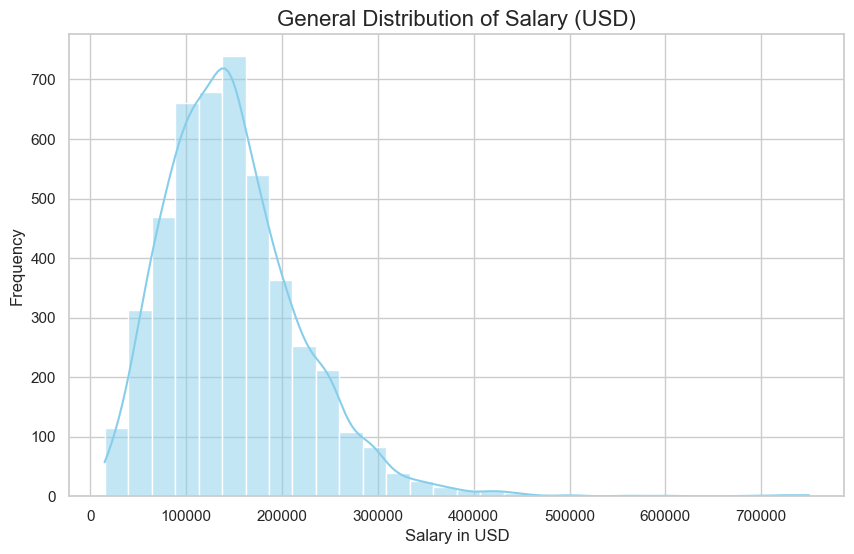

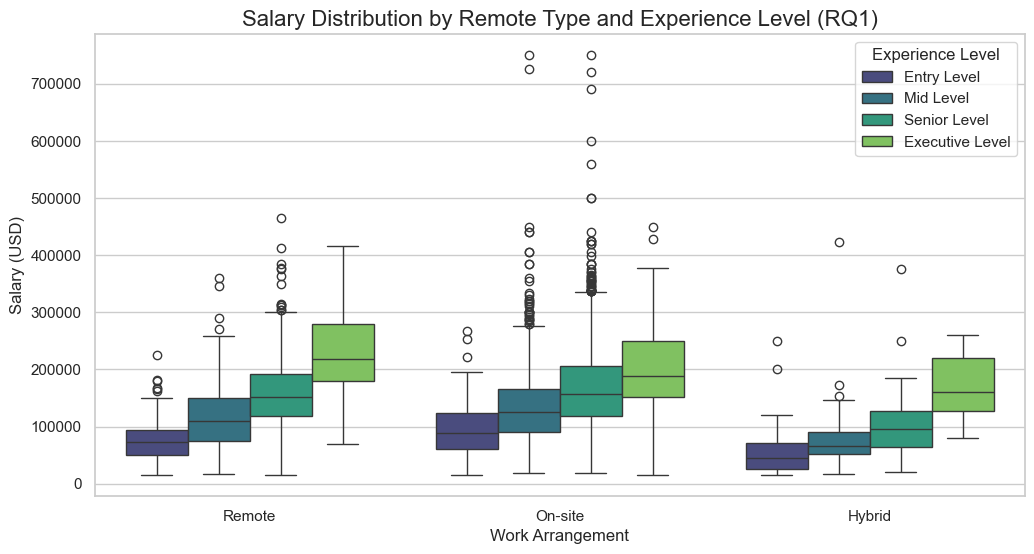

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_3416\3156865223.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


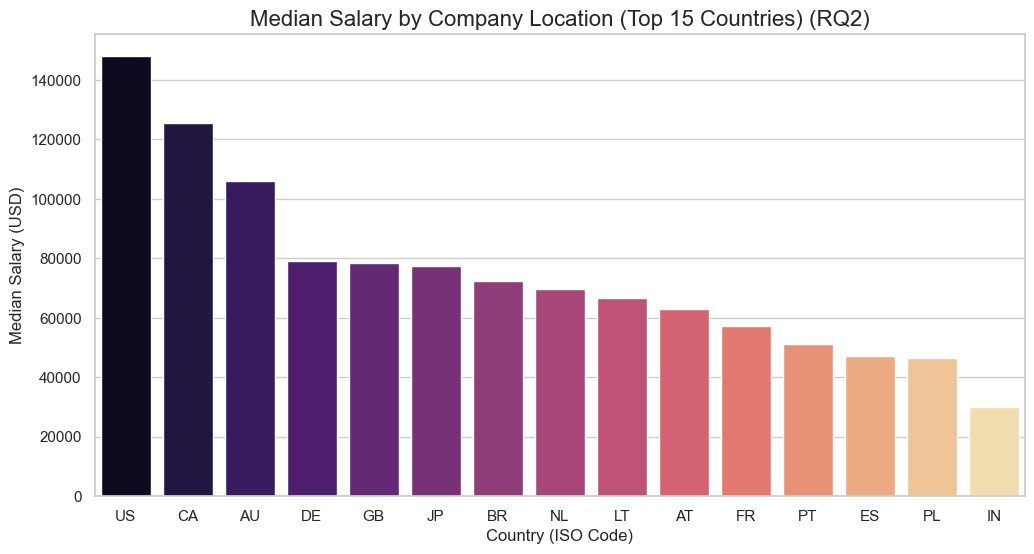

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_3416\3156865223.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


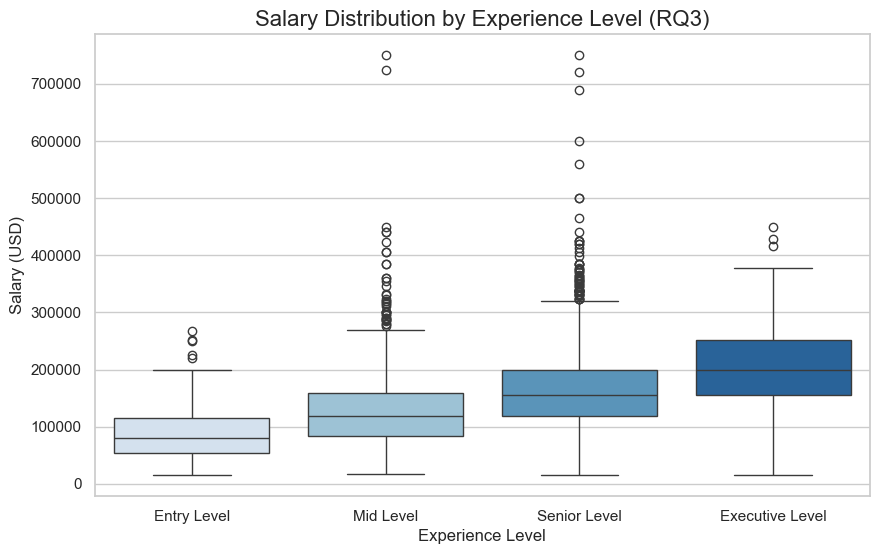

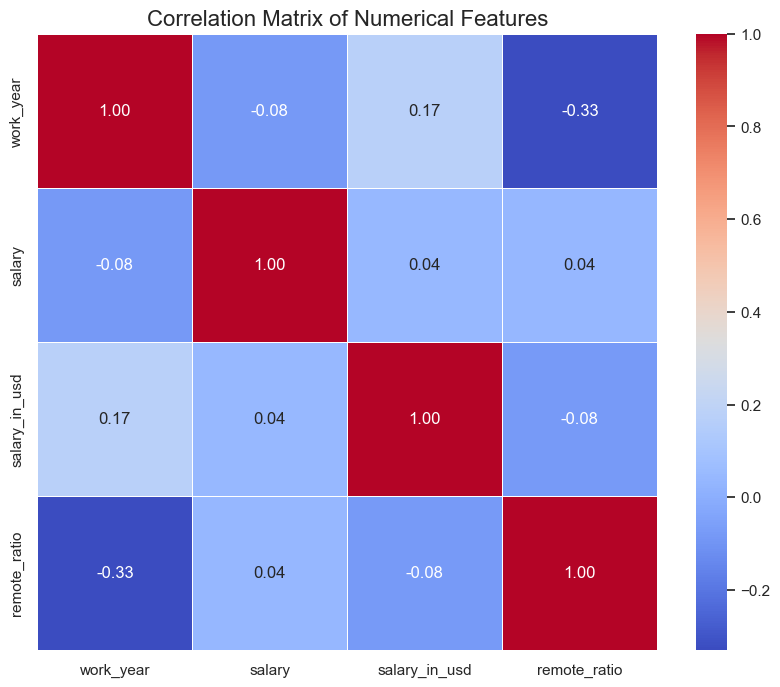

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. SETUP AND DATA LOADING
# ==========================================
# Load the dataset
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Set the visual style for all plots
sns.set(style="whitegrid")

# --- APPLY MAPPINGS BASED ON DATA DESCRIPTION ---

# 1. Experience Level Mapping
experience_map = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}
df['experience_level'] = df['experience_level'].map(experience_map)

# Define the logical order for experience levels (using the new full names)
experience_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']

# 2. Remote Ratio Mapping (Shortened for cleaner charts)
# 0 -> On-site, 50 -> Hybrid, 100 -> Remote
remote_map = {
    0: 'On-site', 
    50: 'Hybrid', 
    100: 'Remote'
}
df['remote_label'] = df['remote_ratio'].map(remote_map)

# 3. Employment Type Mapping (Optional, for reference)
employment_map = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract Basis',
    'FL': 'Freelance'
}
df['employment_type'] = df['employment_type'].map(employment_map)

# 4. Company Size Mapping (Optional, for reference)
size_map = {
    'S': 'Small (<50)',
    'M': 'Medium (50-250)',
    'L': 'Large (>250)'
}
df['company_size'] = df['company_size'].map(size_map)


# ==========================================
# 2. VISUAL 1: GENERAL SALARY DISTRIBUTION
# ==========================================
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='skyblue')
plt.title('General Distribution of Salary (USD)', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# ==========================================
# 3. VISUAL 2 (RQ1): REMOTE WORK IMPACT
# ==========================================
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='remote_label',
    y='salary_in_usd',
    hue='experience_level',
    data=df,
    hue_order=experience_order, # Uses the new full names
    palette='viridis'
)
plt.title('Salary Distribution by Remote Type and Experience Level (RQ1)', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(title='Experience Level')
plt.show()

# ==========================================
# 4. VISUAL 3 (RQ2): GEOGRAPHIC ARBITRAGE
# ==========================================
# Filter for top 15 countries to keep the chart readable
top_countries = df['company_location'].value_counts().head(15).index
country_salary = df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='company_location',
    y='salary_in_usd',
    data=country_salary,
    palette='magma'
)
plt.title('Median Salary by Company Location (Top 15 Countries) (RQ2)', fontsize=16)
plt.xlabel('Country (ISO Code)', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.show()

# ==========================================
# 5. VISUAL 4 (RQ3): TEAM COMPOSITION COST
# ==========================================
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='experience_level',
    y='salary_in_usd',
    data=df,
    order=experience_order, # Uses the new full names
    palette='Blues'
)
plt.title('Salary Distribution by Experience Level (RQ3)', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()

# ==========================================
# 6. VISUAL 5: CORRELATION MATRIX
# ==========================================
# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()